# Music Genre Classification with Logistic Regression

We will explore the following:
    1. Preprocessing 
    2. Baseline Model
    3. Model Evaluation 
    4. Finetuning Model with Grid Search 

In [2]:
# evaluate logistic regression on the music genre classification set with label encoding
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from util import plot_confusion_matrix


In [3]:
# define the location of the dataset
path_3_sec = ('../Data/features_3_sec.csv')
path_30_sec = ('../Data/features_3_sec.csv')
#creating dataframe
df = pd.read_csv(path_3_sec)

# separate into input and output columns
X = df.iloc[:, df.columns != "label"].drop(['filename','length'], axis=1)

#perform scaling
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = np.ravel(df.iloc[:, df.columns == "label"])

In [4]:
#setup for fitting, do label encoding (transform non-numerical labels into numerical labels)
label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.transform(y)

In [5]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# further split the data set to create valid set
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test,test_size=0.50, random_state=1)


## Baseline Model

In [6]:
# define the model
model = LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=1000)
model.fit(X_train, np.ravel(y_train,order='C'))
y_pred = model.predict(X_test)

## Model Evaluation 

In [7]:
yhat = model.predict(X_test)

# predict on validation set
val_pred = model.predict(X_valid)

# evaluate the model
acc_train = model.score(X_train, y_train)
acc_val = accuracy_score(y_valid, val_pred)
acc_test = accuracy_score(y_test, yhat)
print('Accuracy on train set: %.2f' % (acc_train*100))
print('Accuracy on test set: %.2f' % (acc_test*100))
print('Accuracy on valid set: %.2f' % (acc_val*100))



Accuracy on train set: 69.88
Accuracy on test set: 69.36
Accuracy on valid set: 67.50


In [8]:
from sklearn.metrics import mean_squared_error

val_pred,train_pred,test_pred = model.predict(X_valid),model.predict(X_train),model.predict(X_test)

train_err = mean_squared_error(y_train, train_pred)
val_err = mean_squared_error(y_valid, val_pred)
test_err = mean_squared_error(y_test,test_pred)

print('Error on train set: %.2f' % (train_err))
print('Error on valid set: %.2f' % (val_err))
print('Error on test set: %.2f' % (test_err))


Error on train set: 6.70
Error on valid set: 7.24
Error on test set: 7.24


              precision    recall  f1-score   support

           0       0.62      0.66      0.64       171
           1       0.87      0.88      0.87       175
           2       0.73      0.61      0.67       189
           3       0.60      0.61      0.61       163
           4       0.76      0.60      0.67       161
           5       0.69      0.77      0.73       164
           6       0.78      0.87      0.82       174
           7       0.76      0.79      0.77       158
           8       0.63      0.68      0.65       160
           9       0.42      0.39      0.40       133

   micro avg       0.69      0.69      0.69      1648
   macro avg       0.69      0.69      0.68      1648
weighted avg       0.69      0.69      0.69      1648

Confusion matrix, without normalization
[[113   2   4   5   1   9  21   0   9   7]
 [  0 154   2   0   0  12   0   0   2   5]
 [ 16   2 116   9   1  13   2   8   5  17]
 [  5   3   2 100  11   3   3   8   8  20]
 [  4   0   4  13  97   0   7

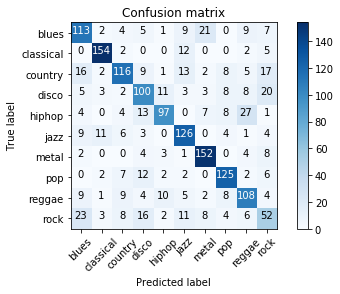

In [10]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, yhat))
cm = confusion_matrix(y_test,y_pred)
test_label = df["label"].unique()
label = list(test_label)
plot_confusion_matrix(cm, label,title='Confusion matrix',save = "CV_LG_Baseline")

## Finetuning Model with Grid Search 

In [67]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C": list(range(1,12)), "max_iter": [1000, 2000, 10000],"solver":['lbfgs']}# l1 lasso l2 ridge

logreg_cv=GridSearchCV(model,grid,cv=10)
logreg_cv.fit(X_train,y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=15, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=3000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'max_iter': [1000, 2000, 10000], 'solver': ['lbfgs']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 11, 'max_iter': 1000, 'solver': 'lbfgs'}
accuracy : 0.712684894666069


In [11]:
model = LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=1000, C = 15, class_weight = "balanced")
model.fit(X_train, np.ravel(y_train,order='C'))

LogisticRegression(C=15, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [12]:
yhat = model.predict(X_test)

# predict on validation set
val_pred = model.predict(X_valid)

# evaluate the model
acc_train = model.score(X_train, y_train)
acc_val = accuracy_score(y_valid, val_pred)
acc_test = accuracy_score(y_test, yhat)
print('Accuracy on train set: %.2f' % (acc_train*100))
print('Accuracy on test set: %.2f' % (acc_test*100))
print('Accuracy on valid set: %.2f' % (acc_val*100))


Accuracy on train set: 73.81
Accuracy on test set: 73.48
Accuracy on valid set: 72.29


In [13]:
from sklearn.metrics import mean_squared_error

val_pred,train_pred,test_pred = model.predict(X_valid),model.predict(X_train),model.predict(X_test)

train_err = mean_squared_error(y_train, train_pred)
val_err = mean_squared_error(y_valid, val_pred)
test_err = mean_squared_error(y_test,test_pred)

print('Error on train set: %.2f' % (train_err))
print('Error on valid set: %.2f' % (val_err))
print('Error on test set: %.2f' % (test_err))

Error on train set: 5.76
Error on valid set: 6.10
Error on test set: 6.00


              precision    recall  f1-score   support

           0       0.70      0.73      0.72       171
           1       0.90      0.92      0.91       175
           2       0.71      0.66      0.68       189
           3       0.70      0.71      0.71       163
           4       0.79      0.66      0.72       161
           5       0.75      0.82      0.78       164
           6       0.82      0.84      0.83       174
           7       0.81      0.79      0.80       158
           8       0.66      0.69      0.67       160
           9       0.46      0.46      0.46       133

   micro avg       0.73      0.73      0.73      1648
   macro avg       0.73      0.73      0.73      1648
weighted avg       0.74      0.73      0.73      1648

Confusion matrix, without normalization
[[113   2   4   5   1   9  21   0   9   7]
 [  0 154   2   0   0  12   0   0   2   5]
 [ 16   2 116   9   1  13   2   8   5  17]
 [  5   3   2 100  11   3   3   8   8  20]
 [  4   0   4  13  97   0   7

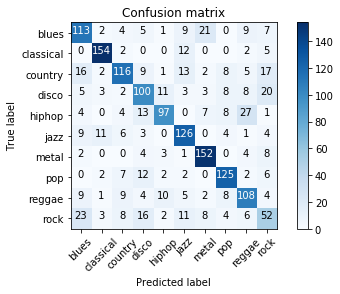

In [14]:
print(classification_report(y_test, yhat))


cm = confusion_matrix(y_test,y_pred)
label = list(test_label)
plot_confusion_matrix(cm, label,title='Confusion matrix',save = "CV_LG_Final")